### Catalina Jaramillo
### Angélica Narvaez

In [1]:
import numpy as np
import pandas as pd 
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
mat = loadmat('dado3.mat')
Y = mat['Y']
R = mat['R']

C:\Users\cataj\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


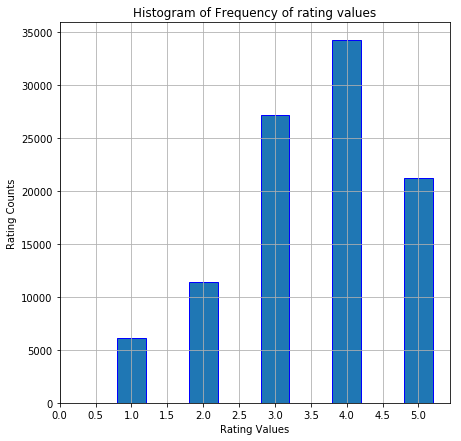

In [3]:
plt.figure(figsize=(7,7))


# ignoring films non rated
bin_edges = np.arange(0.25,5.5,0.5)

plt.hist(Y.flatten(),bins = bin_edges,edgecolor="b",rwidth=0.8)
plt.title('Histogram of Frequency of rating values')
plt.xlabel('Rating Values')
plt.ylabel('Rating Counts')
plt.grid('True')

plt.xticks(np.arange(0,5.5,0.5))
plt.show()

In [4]:
# total of zeros in R, this is, the total films non rated for all users

(R == 0).sum()

1486126

In [5]:
#cost function

def costFunction(params, Y,R, num_users, num_movies, num_features, Lambda):
    
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    
    predictions = X@ Theta.T
    err = predictions-Y
    J = 1/2 *np.sum((err**2)*R)
    
    reg_X = Lambda/2 *np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J+reg_X+reg_Theta
    
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(), Theta_grad.flatten())
    
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    
    return reg_J, reg_grad, err

In [6]:
# random initial weights 

def randInitializeWeights(L_in,L_out):
    epi = (2**(1/2))/(L_in+L_out)**(1/2)
    W = np.random.rand(L_in,L_out)*(2*epi)-epi
    return W

In [7]:
# normalize the ratings, to eliminate the case when some user doesnt rate film

def normalizeRatings(Y, R):
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        # mean of each film
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        # subtracting mean to each rated film
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean

In [8]:
# load names of films
films = open('dado4.txt','r').read().split("\n")

In [9]:
num_movies = Y.shape[0]
num_users = Y.shape[1]
num_features = 100
Lambda = 0

Ynorm, Ymean = normalizeRatings(Y, R)

initial_params = randInitializeWeights(num_movies+num_users, num_features)

### Optimize using conjugate gradient

In [10]:
from scipy import optimize


In [11]:
# Use optimization according to normalized data

args = (Ynorm,R, num_users, num_movies, num_features, Lambda)

res = optimize.minimize(costFunction, initial_params, args=args, method='CG', options={'maxiter':400,'disp':True}, jac=True)

         Current function value: 0.000540
         Iterations: 400
         Function evaluations: 615
         Gradient evaluations: 615


In [12]:
# Parameters X and Theta

params = res.x

X = params[:num_movies*num_features].reshape(num_movies, num_features)
Theta = params[num_movies*num_features:].reshape(num_users, num_features)

In [13]:
# Prediction

pred = X@Theta.T +Ymean


In [14]:
real_mean = np.sum(Y*R, axis=1)/np.sum(R,axis=1)
pred_mean = pred.mean(axis=1)

df = pd.DataFrame({'Film': films, 'Predicted Mean':pred_mean, 'Real mean':real_mean})

#sort the data, but inplace, this is, without create a new temporal matrix
df.sort_values(by='Predicted Mean',ascending=False,inplace=True)
# restart the index of data frame
df.reset_index(drop=True,inplace=True)
df[:10]

,Film,Predicted Mean,Real mean
0,1189 Prefontaine (1997),5.001232,5.0
1,1293 Star Kid (1997),5.001042,5.0
2,"1467 Saint of Fort Washington, The (1993)",5.000869,5.0
3,1599 Someone Else's America (1995),5.000829,5.0
4,1122 They Made Me a Criminal (1939),5.000314,5.0
5,1653 Entertaining Angels: The Dorothy Day Stor...,5.000226,5.0
6,1201 Marlene Dietrich: Shadow and Light (1996),4.999238,5.0
7,1500 Santa with Muscles (1996),4.998954,5.0
8,"814 Great Day in Harlem, A (1994)",4.998869,5.0
9,1536 Aiqing wansui (1994),4.998451,5.0


C:\Users\cataj\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


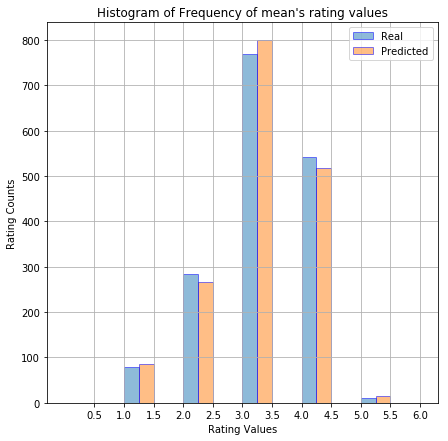

In [15]:
plt.figure(figsize=(7,7))

bin_edges = np.arange(0,6.5,0.5)

# plt.hist(np.around(real_mean,decimals=0),bins = bin_edges,edgecolor="red", alpha = 0.5, label ='Real')
# plt.hist(np.around(pred_mean,decimals=0),bins = bin_edges,edgecolor="blue", alpha = 0.5, label ='Predicted')


plt.hist(np.vstack((np.around(real_mean,decimals=0),np.around(pred_mean,decimals=0))).T,
         bins = bin_edges,edgecolor="blue", alpha = 0.5,rwidth=1, label =['Real','Predicted'])


plt.title("Histogram of Frequency of mean's rating values")
plt.xlabel('Rating Values')
plt.ylabel('Rating Counts')
plt.grid('True')
plt.legend()

plt.xticks(np.arange(0.5,6.5,0.5))
plt.show()

## Error

In [16]:
# error

err = real_mean-pred_mean
norm_err = np.linalg.norm(err)

print(' The norm of exact error is ',norm_err)

 The norm of exact error is  0.8443810314799114


In [17]:
error2 = np.around(real_mean, decimals = 0)- np.around(pred_mean, decimals =0)

print('The percentage of films well-predicted in mean is',((error2==0).sum()/len(err))*100,'%')

The percentage of films well-predicted in mean is 97.08680142687277 %
